In [20]:
#pip install numpy==1.16.1

In [21]:
from tensorflow.python.keras.datasets import imdb
# save np.load
import numpy as np

# call load_data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [22]:
class_names = ['Negative', 'Positive']

In [23]:
word_index = imdb.get_word_index()
#print(word_index['hello'])

In [24]:
reverse_word_index = dict((value, key) for key, value in word_index.items())

def decode(review):
    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ' '
    return text

In [25]:
#decode(x_train[0])

In [26]:
#def show_len():
 #   print('Len of 1st training example: ', len(x_train[0]))
    
    

In [27]:
#word_index['the']

In [28]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 256)
x_test = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 256)

In [29]:
#show_len()

In [30]:
#decode(x_train[0])

In [31]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, Convolution1D, GlobalAveragePooling1D,Dropout,LSTM, Bidirectional
 
model = Sequential([
    Embedding(10000, 128),
    Convolution1D(32,2,input_shape= (None,64,1), activation='relu'),
    Bidirectional(LSTM(32)),
    #Bidirectional(LSTM(32)),
    #GlobalAveragePooling1D(),
    #Convolution1D(5,2, input_shape= (None,64,1), activation='relu'),
    #GlobalAveragePooling1D(),
    Dropout(0.5),
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 32)          8224      
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [32]:
from tensorflow.python.keras.callbacks import Callback
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True
 
simple_log = myCallback()
 
E = 7
 
h = model.fit(
x_train, y_train,
validation_split=0.2,
epochs = E,
callbacks= [simple_log],
verbose = True)

Epoch 1/7
625/625 [==============================] - 424s 672ms/step - loss: 0.5770 - accuracy: 0.6557 - val_loss: 0.3208 - val_accuracy: 0.8720
Epoch 2/7
625/625 [==============================] - 421s 674ms/step - loss: 0.2473 - accuracy: 0.9114 - val_loss: 0.3083 - val_accuracy: 0.8740
Epoch 3/7
625/625 [==============================] - 419s 670ms/step - loss: 0.1573 - accuracy: 0.9455 - val_loss: 0.3196 - val_accuracy: 0.8750
Epoch 4/7
625/625 [==============================] - 420s 672ms/step - loss: 0.1009 - accuracy: 0.9664 - val_loss: 0.3499 - val_accuracy: 0.8786
Epoch 5/7
625/625 [==============================] - 414s 662ms/step - loss: 0.0736 - accuracy: 0.9767 - val_loss: 0.4151 - val_accuracy: 0.8744
Epoch 6/7
625/625 [==============================] - 410s 656ms/step - loss: 0.0562 - accuracy: 0.9829 - val_loss: 0.4592 - val_accuracy: 0.8712

Reached 98% accuracy so cancelling training!


In [33]:
"""from tensorflow.keras import models
model = models.load_model("/content/Model")"""

'from tensorflow.keras import models\nmodel = models.load_model("/content/Model")'

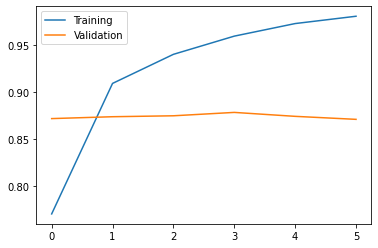

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
E = 6
plt.plot(range(E), h.history['accuracy'], label = 'Training')
plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
txt = ('The movie was cool. The animation and the graphics '
            'were out of this world. I would recommend this movie.')

txt = input("Enter the Comment:")
txt = (txt)

tk = Tokenizer(lower=True)
tk.fit_on_texts(txt)
X_seq = tk.texts_to_sequences(txt)
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenized_text = pad_sequences(X_seq, value = word_index['the'], padding='post', maxlen=256)

In [ ]:
prediction = (model.predict(tokenized_text, verbose=1) > 0.5).astype("int32")
# or prediction = model.predict_classes(tokenized_text) #deprecated
print( class_names[prediction[0,0]]) #first batch prediction